In [1]:
import json
import zipfile
import os
import pandas as pd
import numpy as np

In [2]:
# Install and start postgresql-11 server
!sudo apt-get -y -qq update
!wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | sudo apt-key add -
!echo "deb http://apt.postgresql.org/pub/repos/apt/ `lsb_release -cs`-pgdg main" |sudo tee  /etc/apt/sources.list.d/pgdg.list
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql-11 postgresql-client-11
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432
%env DEMO_DATABASE_USER=postgres
%env DEMO_DATABASE_PASS=postgres

OK
deb http://apt.postgresql.org/pub/repos/apt/ focal-pgdg main
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 13.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-136ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-136ubuntu1) ...
Selecting previously unselected package libjson-perl.
Preparing to unpack .../01-libjson-perl_4.02000-2_all.deb ...
Unpacking libjson-perl (4.02000-2) ...
Selecting previously unselected package netbase.
Preparing to unpack .../02-netbase_6.1_all.deb ...
Unpacking

In [3]:
# Download sampled DonorsChoose data and load it into our postgres server
!curl -s -OL https://dsapp-public-data-migrated.s3.us-west-2.amazonaws.com/donors_sampled_20210920_v3.dmp
!PGPASSWORD=$DEMO_DATABASE_PASS pg_restore -h $DEMO_DATABASE_HOST -p $DEMO_DATABASE_PORT -d $DEMO_DATABASE_NAME -U $DEMO_DATABASE_USER -O -j 8 donors_sampled_20210920_v3.dmp
!pip install SQLAlchemy==1.3.18 PyYAML==6.0 psycopg2-binary==2.9.3
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine

db_url = URL(
            'postgres',
            host='localhost',
            username='postgres',
            database='donors_choose',
            password='postgres',
            port=5432,
        )

db_engine = create_engine(db_url)
full_projects = pd.read_sql("SELECT * FROM data.projects", db_engine)
full_resources = pd.read_sql("SELECT * FROM data.resources", db_engine)
full_donations = pd.read_sql("SELECT * FROM data.donations", db_engine)


full_projects=full_projects.rename(columns = {'projectid_str':'projectid', "total_asking_price":"total_price_excluding_optional_support"})
full_donations = full_donations.rename(columns = {'projectid_str':'projectid'})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.1 MB/s eta 0:00:00
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.3.18-cp39-cp39-linux_x86_64.whl size=1250896 sha256=17548c059c1c9b36cce7d37470acfa4f3c06d5fc3920a3e7f1be0c73c709bb53
  Stored in directory: /root/.cache/pip/wheels/a9/64/4b/d932f1cde56100ccee97a4488f9ef96427a392979405170800
Successfully built SQLAlchemy
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 1.4.47
    Uninstalling SQLAlchemy-1.4.47:
      Successfully uninstalled SQLAlchemy-1.4.47


In [4]:
import json
import zipfile
import os
import pandas as pd

In [5]:
!pip install kaggle

!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
api_token = {"username":"ploped123","key":"eeeeba8fc52706723e4c1bcf41ae6fd3"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c kdd-cup-2014-predicting-excitement-at-donors-choose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 918M/926M [00:05<00:00, 170MB/s]
100% 926M/926M [00:05<00:00, 171MB/s]


In [6]:
!ls /content

donors_sampled_20210920_v3.dmp				 sample_data
kdd-cup-2014-predicting-excitement-at-donors-choose.zip


In [7]:
!unzip /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip

Archive:  /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip
  inflating: donations.csv.zip       
  inflating: essays.csv.zip          
  inflating: outcomes.csv.zip        
  inflating: projects.csv.zip        
  inflating: resources.csv.zip       
  inflating: sampleSubmission.csv.zip  


In [8]:
!unzip /content/resources.csv.zip
!unzip /content/donations.csv.zip

Archive:  /content/resources.csv.zip
  inflating: resources.csv           
Archive:  /content/donations.csv.zip
  inflating: donations.csv           


In [9]:
!unzip /content/projects.csv.zip

Archive:  /content/projects.csv.zip
  inflating: projects.csv            


In [11]:
full_donations = pd.read_csv("/content/donations.csv")
full_projects = pd.read_csv("/content/projects.csv")
# full_essays = pd.read_csv("essays.csv")
full_resources = pd.read_csv("/content/resources.csv")

In [12]:
from datetime import timedelta
!pip install textstat
!pip install flair

import textstat

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
a = pd.merge(full_projects, full_donations, on=['projectid'], how='left')
a['in_4_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=120)
a['in_1_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=30)
a['donation_1mo'] = a['donation_to_project'].values
values = {'donation_to_project': 0.0}
a = a.fillna(value=values)
a.loc[a['in_4_months'] == False, 'donation_to_project'] = 0.0
a.loc[a['in_1_months'] == False, 'donation_1mo'] = 0.0

donation_in_4_months = a.groupby(['projectid'])['donation_to_project'].sum().reset_index(name='donation_in_4_months')
donation_in_1_months = a.groupby(['projectid'])['donation_1mo'].sum().reset_index(name='donation_in_1_months')
df = pd.merge(full_projects, donation_in_4_months, on=['projectid'], how='left')
df = pd.merge(df, donation_in_1_months, on=['projectid'], how='left')

del a

In [14]:
df['is_fully_funded_after_4_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_4_months']
# df['is_fully_funded_after_4_months'] = df['total_asking_price'] <= df['donation_in_4_months']
df['is_fully_funded_after_4_months'].value_counts()
print("Baserate % projects fully funded:", df['is_fully_funded_after_4_months'].mean())

df['pct_funded_1mo'] = df['donation_in_1_months'] / df['total_price_excluding_optional_support']
df['is_fully_funded_after_1_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_1_months']
#df['is_fully_funded_after_1_months'] = df['total_asking_price'] <= df['donation_in_1_months']
df['is_fully_funded_after_1_months'].value_counts()
print("Baserate % projects fully funded 1mo:", df['is_fully_funded_after_1_months'].mean())

Baserate % projects fully funded: 0.5480215269433126
Baserate % projects fully funded 1mo: 0.30470804007842217


In [15]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['children_helped_per_dollar'] = df['students_reached']/df['total_price_excluding_optional_support']

In [16]:
print(df.columns, df.shape)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'donation_in_4_months', 'donation_in_1_months',
       'is_fully_funded_after_4_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'child

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_feature_cols = ['grade_level', 'teacher_prefix']
df = df.replace({'school_charter': {'t': 1, 'f': 0},
                 'school_kipp': {'t': 1, 'f': 0}})

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df[one_hot_feature_cols]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
#merge one-hot encoded columns back with original DataFrame
final_X = df.join(encoder_df)
#drop the original columns
final_X = final_X.drop(one_hot_feature_cols, axis=1)

#df = final_X

# # row 28-36
feature_cols_projects = ['school_charter', 'school_kipp', 'total_price_excluding_optional_support', 'students_reached', 'teacher_acctid', 'school_city', 'date_posted'] + list(final_X.columns[-50:])

In [23]:
df = final_X
print(final_X.columns)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'donation_in_4_months', 'donation_in_1_months',
       'is_fully_funded_after_4_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
       'g

In [22]:
!unzip /content/essays.csv.zip
full_essays = pd.read_csv("/content/essays.csv")
full_essays.head()

Archive:  /content/essays.csv.zip
  inflating: essays.csv              


,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything...,My students need a camcorder.,Can you imagine having to translate everything...
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,It takes a special person to donate to a group...,My students need 17 assorted classroom materia...,Hi. I teach a wonderful group of 4-5 year old ...
3,ffff7266778f71242675416e600b94e1,b9a8f14199e0d8109200ece179281f4f,Let's Find Out!,My Kindergarten students come from a variety o...,"My students need 25 copies of Scholastic's ""Le...",My Kindergarten students come from a variety o...
4,ffff418bb42fad24347527ad96100f81,e885fb002a1d0d39aaed9d21a7683549,Whistle While We Work!,"By using the cross curricular games requested,...",My students need grade level appropriate games...,All work and no play makes school a dull place...


In [24]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [25]:
sid = SentimentIntensityAnalyzer()
for col in ['title','short_description', 'need_statement', 'essay']:
  print(col)
  full_essays[col + '_len'] = full_essays[col].str.len()
  full_essays[col + '_wordlen'] = full_essays[col].astype(str).apply(lambda x: len(x) / len(x.split(' ')))

for col in ['title','short_description']:
  print(col)
  full_essays[col + '_sent'] = full_essays[col].astype(str).apply(lambda x: sid.polarity_scores(x))
  full_essays[col + '_sentnet'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] - x['neg'])
  full_essays[col + '_sentpol'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] + x['neg'])

title
short_description
need_statement
essay
title
short_description


In [26]:
full_essays = full_essays.drop(columns=['teacher_acctid', 'title', 'short_description', 'need_statement', 'essay'])

In [27]:
df = pd.merge(df, full_essays, on=['projectid'], how='left')

In [28]:
df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'donation_in_4_months', 'donation_in_1_months',
       'is_fully_funded_after_4_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
       'g

In [29]:
import numpy as np

In [30]:
resource_df = full_resources[['resourceid', 'projectid', 'project_resource_type', 'item_unit_price', 'item_quantity']]
resource_df['project_resource_type'] = resource_df['project_resource_type'].astype('str')

# Fill in missing values of item_unit_price & item_quantity
resource_types = np.unique(resource_df['project_resource_type'].tolist())
avg_unit_price = {}
avg_quantity = {}
for rtype in resource_types:
  avg = resource_df.loc[resource_df['project_resource_type'] == rtype]['item_unit_price'].mean()
  avg_unit_price[rtype] = avg
  avg_num = np.floor(resource_df.loc[resource_df['project_resource_type'] == rtype]['item_quantity'].mean())
  avg_quantity[rtype] = avg_num

resource_df['avg_unit_price'] = resource_df.apply(lambda row: avg_unit_price[row['project_resource_type']], axis=1) # This could take a minute to run
resource_df['avg_quantity'] = resource_df.apply(lambda row: avg_quantity[row['project_resource_type']], axis=1)

resource_df['item_unit_price'] = resource_df['item_unit_price'].fillna(resource_df['avg_unit_price'])
resource_df['item_quantity'] = resource_df['item_quantity'].fillna(resource_df['avg_quantity'])

resource_df = resource_df.groupby('projectid').agg({'item_unit_price':'mean', 'item_quantity':'sum'}).reset_index().rename(columns={'item_unit_price':'avg_unit_price', 'item_quantity':'total_item_quantity'})
df = df.merge(resource_df, how='left', on='projectid')

<ipython-input-30-4fa936b62856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_df['project_resource_type'] = resource_df['project_resource_type'].astype('str')
<ipython-input-30-4fa936b62856>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_df['avg_unit_price'] = resource_df.apply(lambda row: avg_unit_price[row['project_resource_type']], axis=1) # This could take a minute to run
<ipython-input-30-4fa936b62856>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [43]:
print(set(['students_reached', 'children_helped_per_dollar', 'primary_focus_area', 'resource_type', 'poverty_level']) - set(df.columns))
print(df.columns)

set()
Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'donation_in_4_months', 'donation_in_1_months',
       'is_fully_funded_after_4_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
   

In [45]:
resstat_cols = ['students_reached', 'children_helped_per_dollar', 'primary_focus_area', 'resource_type', 'poverty_level']

text_cols = ['title_len', 'title_sentnet', 'title_sentpol', 'short_description_len', 'short_description_sentnet', 'short_description_sentpol','essay_len', 'need_statement_len']
res_cols = ['avg_unit_price', 'total_item_quantity']
don_cols = ['pct_funded_1mo']
features = ['projectid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'donation_in_4_months', 'donation_in_1_months',
       'is_fully_funded_after_4_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'grade_level_nan', 'teacher_prefix_Dr.', 'teacher_prefix_Mr.',
       'teacher_prefix_Mr. & Mrs.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_nan', 'title_len',
       'title_wordlen', 'short_description_len', 'short_description_wordlen',
       'need_statement_len', 'need_statement_wordlen', 'essay_len',
       'essay_wordlen', 'title_sent', 'title_sentnet', 'title_sentpol',
       'short_description_sent', 'short_description_sentnet',
       'short_description_sentpol', 'avg_unit_price', 'total_item_quantity']
#Y = ['is_fully_funded_after_4_months']
#print(features)
#print()
df_final = df[features].copy(deep=True)

print(sorted(list(df.columns)))
print(sorted(list(df_final.columns)))

# Silences a warning that doesn't affect anything
pd.options.mode.chained_assignment = None

for i in reversed(['primary_focus_area', 'resource_type', 'poverty_level']):
  new_addition = pd.get_dummies(df_final[i])
  new_addition.columns = [i + ":" + x.replace(" ","_") for x in new_addition.columns]
  for col_name in new_addition.columns:
    df_final[col_name] = new_addition[col_name].copy(deep=True)
df_final.drop(columns = ['primary_focus_area', 'resource_type', 'poverty_level'], inplace=True)
print(df_final.columns)

['avg_unit_price', 'children_helped_per_dollar', 'date_posted', 'donation_in_1_months', 'donation_in_4_months', 'eligible_almost_home_match', 'eligible_double_your_impact_match', 'essay_len', 'essay_wordlen', 'fulfillment_labor_materials', 'grade_level_Grades 3-5', 'grade_level_Grades 6-8', 'grade_level_Grades 9-12', 'grade_level_Grades PreK-2', 'grade_level_nan', 'is_fully_funded_after_1_months', 'is_fully_funded_after_4_months', 'need_statement_len', 'need_statement_wordlen', 'pct_funded_1mo', 'poverty_level', 'primary_focus_area', 'primary_focus_subject', 'projectid', 'resource_type', 'school_charter', 'school_charter_ready_promise', 'school_city', 'school_county', 'school_district', 'school_kipp', 'school_latitude', 'school_longitude', 'school_magnet', 'school_metro', 'school_ncesid', 'school_nlns', 'school_state', 'school_year_round', 'school_zip', 'schoolid', 'secondary_focus_area', 'secondary_focus_subject', 'short_description_len', 'short_description_sent', 'short_description_s

In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_final.dtypes)

projectid                                         object
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_zip                                       float64
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                     int64
school_magnet                                     object
school_year_round                                 object
school_nlns                                       object
school_kipp                                        int64
school_charter_ready_promise                      object
teacher_teach_for_america                         object
teacher_ny_teaching_fellow                        object
primary_focus_subject          

In [57]:
final_cols = ['school_latitude', 'school_longitude', 
        'school_kipp', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'date_posted', 'donation_in_1_months',
       'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'grade_level_nan', 'teacher_prefix_Dr.', 'teacher_prefix_Mr.',
       'teacher_prefix_Mr. & Mrs.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_nan', 'title_len',
       'title_wordlen', 'short_description_len', 'short_description_wordlen',
       'need_statement_len', 'need_statement_wordlen', 'essay_len',
       'essay_wordlen', 'title_sentnet', 'title_sentpol', 'short_description_sentnet',
       'short_description_sentpol', 'avg_unit_price', 'total_item_quantity',
       'poverty_level:high_poverty', 'poverty_level:highest_poverty',
       'poverty_level:low_poverty', 'poverty_level:moderate_poverty',
       'resource_type:Books', 'resource_type:Other', 'resource_type:Supplies',
       'resource_type:Technology', 'resource_type:Trips',
       'resource_type:Visitors', 'primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs',
       'is_fully_funded_after_4_months']
df_export = df_final[final_cols]

In [58]:
df_export = df_export.set_index('date_posted')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_export.dtypes)
print(test_df.index)

school_latitude                           float64
school_longitude                          float64
school_kipp                                 int64
fulfillment_labor_materials               float64
total_price_excluding_optional_support    float64
total_price_including_optional_support    float64
students_reached                          float64
donation_in_1_months                      float64
pct_funded_1mo                            float64
is_fully_funded_after_1_months               bool
children_helped_per_dollar                float64
grade_level_Grades 3-5                    float64
grade_level_Grades 6-8                    float64
grade_level_Grades 9-12                   float64
grade_level_Grades PreK-2                 float64
grade_level_nan                           float64
teacher_prefix_Dr.                        float64
teacher_prefix_Mr.                        float64
teacher_prefix_Mr. & Mrs.                 float64
teacher_prefix_Mrs.                       float64


In [60]:
for col in ['is_fully_funded_after_1_months', 'is_fully_funded_after_4_months']:
  df_export[col] = df_export[col].astype(int)

In [94]:
# Identify rows with infinite values
inf_rows = np.any(np.isinf(df_export), axis=1)

# Drop rows with infinite values
df_export = df_export.drop(index=df_export.index[inf_rows])

#print(df_export.columns)

In [98]:
df_export = df_export.fillna(df_export.mean())

df_export.to_csv('final_dataset.csv')

In [154]:
df_new = df_export

pos_label = df_new['is_fully_funded_after_4_months'] == 1

y = df_new['is_fully_funded_after_4_months'].to_numpy()

df_new = df_new.drop([#'primary_focus_area:Applied_Learning',
      #  'primary_focus_area:Health_&_Sports',
      #  'primary_focus_area:History_&_Civics',
      #  'primary_focus_area:Literacy_&_Language',
      #  'primary_focus_area:Math_&_Science',
      #  'primary_focus_area:Music_&_The_Arts',
      #  'primary_focus_area:Special_Needs',
       'is_fully_funded_after_4_months'], axis=1)
df_new = df_new[['resource_type:Technology',
                 'poverty_level:highest_poverty',
                 'primary_focus_area:Applied_Learning', 'school_latitude', 'school_longitude', 'school_kipp',
        'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'donation_in_1_months', 'pct_funded_1mo',
       'is_fully_funded_after_1_months', 'children_helped_per_dollar',
       'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'grade_level_nan', 'teacher_prefix_Dr.', 'teacher_prefix_Mr.',
       'teacher_prefix_Mr. & Mrs.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_nan', 'title_len',
       'title_wordlen', 'short_description_len', 'short_description_wordlen',
       'need_statement_len', 'need_statement_wordlen', 'essay_len',
       'essay_wordlen', 'title_sentnet', 'title_sentpol',
       'short_description_sentnet', 'short_description_sentpol',
       'avg_unit_price', 'total_item_quantity', 'poverty_level:high_poverty',
        'poverty_level:low_poverty',
       'poverty_level:moderate_poverty', 
       #'resource_type:Books',
      #  'resource_type:Other', 'resource_type:Supplies',
      #   'resource_type:Trips',
      #  'resource_type:Visitors'
       ]]
X = df_new.to_numpy()

print(np.sum(np.isnan(X)))

print(X.max(), X.min())
print(X.shape, y.shape)

0
12500020.73 -176.634989
(663469, 48) (663469,)


In [155]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=234)
train_minority = X_train[:,0]
#X_train = X_train[:,1:]

test_minority = X_test[:,0]
#X_test = X_test[:,1:]

In [184]:
X_minority = X[:,0]


# Dataset Discrimination
print(np.mean(y), np.mean(X_minority))
b = (sum(y*X_minority)/sum(X_minority))
w = (sum(y*(1-X_minority))/sum(1-X_minority))

print(list(df_new.columns)[0], w - b, np.mean(X[:,0]))

0.5477949987113189 0.3256218451804078
resource_type:Technology 0.09418890316727463 0.3256218451804078


In [158]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [159]:
y_train_pred = model.predict(X_train)
train_preds = [round(value) for value in y_train_pred]
accuracy = accuracy_score(y_train, train_preds)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 82.89%


In [160]:
y_test_pred = model.predict(X_test)
test_preds = [round(value) for value in y_test_pred]
accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 81.94%


In [163]:
y_pred = model.predict(X)
y_pred = [round(value) for value in y_pred]


# Classifier Discrimination
b = (sum(y_pred*X_minority)/sum(X_minority))
w = (sum(y_pred*(1-X_minority))/sum(1-X_minority))

print(list(df_new.columns)[0], w - b)

resource_type:Technology 0.12276929446714036


In [181]:
w = np.zeros(y_train.shape)

for label in [0, 1]:
  for sensitive_attr_val in [0, 1]:
    num = np.sum(X_train[:,0] == sensitive_attr_val)*np.sum(y_train == label)
    den = len(X_train)*np.sum((X_train[:,0] == sensitive_attr_val)*(y_train == label))
    w += (X_train[:,0] == sensitive_attr_val)*(y_train == label) * (num/den)
    print(label, sensitive_attr_val, num/den)

0 0 1.0722876652406401
0 1 0.8776516831623297
1 0 0.9472819893265988
1 1 1.1300466018359698


In [174]:
print(set(w))

{0.9472819893265988, 1.1300466018359698, 0.8776516831623297, 1.0722876652406401}


In [175]:
model_reweigh = XGBClassifier()
model_reweigh.fit(X_train, y_train, sample_weight=w)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [176]:
y_train_pred = model_reweigh.predict(X_train)
train_preds = [round(value) for value in y_train_pred]
accuracy = accuracy_score(y_train, train_preds)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 82.82%


In [177]:
y_test_pred = model_reweigh.predict(X_test)
test_preds = [round(value) for value in y_test_pred]
accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 81.88%


In [178]:
y_pred = model_reweigh.predict(X)
y_pred = [round(value) for value in y_pred]


# Classifier Discrimination
b = (sum(y_pred*X_minority)/sum(X_minority))
w = (sum(y_pred*(1-X_minority))/sum(1-X_minority))

print(list(df_new.columns)[0], w - b)

resource_type:Technology 0.07098916211874146


In [195]:
from numpy import random

random.seed(345)

final_samples = np.zeros((530773, 48))
final_ys = np.zeros(530773)
s = 0
for label in [0, 1]:
  for sensitive_attr_val in [0, 1]:
    num = np.sum(X_train[:,0] == sensitive_attr_val)*np.sum(y_train == label)
    den = len(X_train)*np.sum((X_train[:,0] == sensitive_attr_val)*(y_train == label))
    (X_train[:,0] == sensitive_attr_val)*(y_train == label) * (num/den)
    #print(label, sensitive_attr_val, int(np.sum(X_train[:,0] == sensitive_attr_val)*np.sum(y_train == label)/len(X_train)))
    nxt = int(np.sum(X_train[:,0] == sensitive_attr_val)*np.sum(y_train == label)/len(X_train))

    #print((np.arange(len(X_train))*(X_train[:,0] == sensitive_attr_val)*(y_train == label))[:100])
    #print(list(set(np.arange(len(X_train))*(X_train[:,0] == sensitive_attr_val)*(y_train == label)) - set([0]))[:100])
    samples = random.choice(list(set(np.arange(len(X_train))*(X_train[:,0] == sensitive_attr_val)*(y_train == label)) - set([0])), size = nxt)

    final_samples[s:s+nxt] = X_train[samples]
    final_ys[s:s+nxt] = y_train[samples]
    s += nxt

In [196]:
model_sample = XGBClassifier()
model_sample.fit(final_samples, final_ys)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [197]:
y_train_pred = model_sample.predict(X_train)
train_preds = [round(value) for value in y_train_pred]
accuracy = accuracy_score(y_train, train_preds)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 82.57%


In [198]:
y_test_pred = model_sample.predict(X_test)
test_preds = [round(value) for value in y_test_pred]
accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 81.75%


In [199]:
y_pred = model_sample.predict(X)
y_pred = [round(value) for value in y_pred]


# Classifier Discrimination
b = (sum(y_pred*X_minority)/sum(X_minority))
w = (sum(y_pred*(1-X_minority))/sum(1-X_minority))

print(list(df_new.columns)[0], w - b)

resource_type:Technology 0.06971685262761973


Literacy & Language 298758
History & Civics 31131
Math & Science 164339
Health & Sports 18445
Applied Learning 49534
Special Needs 41959
Music & The Arts 59893


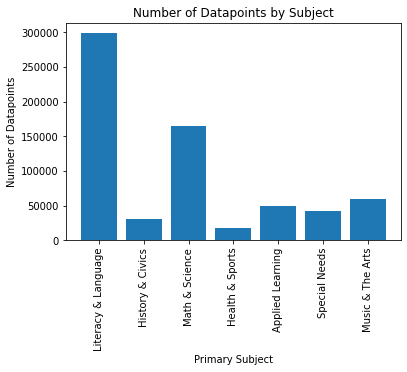

In [ ]:
import matplotlib.pyplot as plt

x = []
y = []

for sub in ['Literacy & Language', 'History & Civics', 'Math & Science', 'Health & Sports', 'Applied Learning', 'Special Needs', 'Music & The Arts']:
  print(sub, df[df['primary_focus_area'] == sub].shape[0])
  x.append(sub)
  y.append(df[df['primary_focus_area'] == sub].shape[0])

plt.bar(x, y)
plt.title("Number of Datapoints by Subject")
plt.xlabel("Primary Subject")
plt.ylabel("Number of Datapoints")
plt.xticks(rotation=90)
plt.show()

In [66]:
df = df_export

minority_df = df[df['primary_focus_area:Applied_Learning'] == 1]
majority_df = df[df['primary_focus_area:Applied_Learning'] != 1]

minority_df = minority_df.drop(['primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs'], axis=1)
majority_df = majority_df.drop(['primary_focus_area:Applied_Learning',
       'primary_focus_area:Health_&_Sports',
       'primary_focus_area:History_&_Civics',
       'primary_focus_area:Literacy_&_Language',
       'primary_focus_area:Math_&_Science',
       'primary_focus_area:Music_&_The_Arts',
       'primary_focus_area:Special_Needs'], axis=1)

print("Minority data is", majority_df.shape[0]/minority_df.shape[0], "times smaller than the majority")

Minority data is 12.40691242378972 times smaller than the majority


In [67]:
print(minority_df['is_fully_funded_after_4_months'].mean())
print(majority_df['is_fully_funded_after_4_months'].mean())

0.5054508014696976
0.5514527372250897


In [68]:
from sklearn.linear_model import LogisticRegression

group_labels = df['primary_focus_area:Applied_Learning'] == 1

data = 

# Train a classifier for group A
mask_A = (group_labels == True)
X_A, y_A = X[mask_A], y[mask_A]
clf_A = LogisticRegression()
clf_A.fit(X_A, y_A)

# Train a classifier for group B
mask_B = (group_labels == False)
X_B, y_B = X[mask_B], y[mask_B]
clf_B = LogisticRegression()
clf_B.fit(X_B, y_B)

NameError: ignored

In [ ]:
def compute_joint_loss(group_labels, y_A, z_A, y_B, z_B, lamb=0.5):
  n = len(y_A) + len(y_B)
  avg_z =  1/2 * (np.sum(z_A) + np.sum(z_B))
  diff_pos = (np.abs(np.sum(z_A) - avg_z) + np.abs(np.sum(z_B) - avg_z)) * (1-lamb)/n
  tmp = lamb*(np.mean(np.abs(y_A-z_A)))
  tmp2 = lamb * (np.mean(np.abs(y_B-z_B)))
  return tmp + tmp2 + diff_pos

# Step 1: Train a classifier on group A to get different profiles
classifier_A = clf_A
profiles_A = np.arange(100)/100

# Step 2: Train a classifier on group B to get different profiles
classifier_B = clf_B
profiles_B = np.arange(100)/100

# Step 3: Select the profile that minimizes joint loss
joint_loss_min = float('inf')
selected_profile_A = None
selected_profile_B = None

A_prob = clf_A.predict_proba(X_A)[:,1]
B_prob = clf_B.predict_proba(X_B)[:,1]
for profile_A in profiles_A:
    for profile_B in profiles_B:
        joint_loss = compute_joint_loss(group_labels, (A_prob > profile_A).astype(np.int32), y_A, (B_prob > profile_B).astype(np.int32), y_B)
        if joint_loss < joint_loss_min:
            # print("A: new_profile: ", profile_A, "old_profile: ", selected_profile_A)
            # print("B: new_profile: ", profile_B, "old_profile: ", selected_profile_B)
            # print("new_loss: ", joint_loss, "old_loss: ", joint_loss_min)
            joint_loss_min = joint_loss
            selected_profile_A = profile_A
            selected_profile_B = profile_B

# The selected profiles can now be used to make predictions on new data
predictions_A = clf_A.predict_proba(X_A) > selected_profile_A
predictions_B = clf_B.predict_proba(X_B) > selected_profile_B